In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import matplotlib.gridspec as gridspec

In [15]:
def make_colorbar(composites):
    params = []
    # for comp in composites:
    # 	params.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
    # norm = matplotlib.colors.Normalize(vmin=np.min(params),vmax=np.max(params))
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=len(composites) + 1.)
    c_m = matplotlib.cm.plasma
    # c_m = matplotlib.cm.winter_r
    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
    s_m.set_array([])

    return s_m

In [16]:
def comparison_plot(composites):

#     plt.style.use('ggplot')
    colors = [color['color'] for color in list(plt.rcParams['axes.prop_cycle'])]
    h = [3,1,1,1,1,1,1]
    font = {'family' : 'serif',
        'color'  : 'black',
        'size'   : 25,
        }

#     gs = gridspec.GridSpec(7, 1, height_ratios=h, hspace = .001)
#     fig = plt.figure(num = 1, dpi = 100, figsize = [10,10])
    fig = plt.figure(num = 1, dpi = 100, figsize = [10,8])
    s_m = make_colorbar(composites)
    lw = 3

    composites, scales = composite.optimize_scales(composites, composites[0], True)
    
    plt.rc('font', family='serif')
    plt.gca().set_yticklabels([])
    plt.minorticks_on()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(
        which='major', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=10)
    plt.tick_params(
        which='minor', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=5)
    
    i = 0
    k = 1
    for comp in composites:
        # param = np.average(comp.dm15_array[comp.x1:comp.x2])
        param = k

#         rel_flux = plt.subplot(gs[0])
        rel_flux = plt.subplot(111)
#         plt.setp(rel_flux.get_xticklabels(), visible=False)
        plt.ylabel('Relative Flux', fontdict = font)
#         rel_flux.axes.get_yaxis().set_ticks([])
        # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], color = s_m.to_rgba(param))
        plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))
        if len(comp.low_conf) > 0 and len(comp.up_conf) > 0:
            plt.fill_between(comp.wavelength[comp.x1:comp.x2], comp.low_conf[comp.x1:comp.x2], 
                             comp.up_conf[comp.x1:comp.x2], color = s_m.to_rgba(param), alpha = 0.5)
            # plt.fill_between(comp.wavelength[comp.x1:comp.x2], comp.low_conf[comp.x1:comp.x2], 
            # 	             comp.up_conf[comp.x1:comp.x2], color = colors[i%len(colors)], alpha = 0.5)

#         var = plt.subplot(gs[1], sharex = rel_flux)
#         plt.setp(var.get_xticklabels(), visible=False)
#         plt.ylabel('Variance', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.ivar[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.ivar[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         res = plt.subplot(gs[2], sharex = rel_flux)
#         plt.setp(res.get_xticklabels(), visible=False)
#         plt.ylabel('Residuals', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))
#         if len(comp.low_conf) > 0 and len(comp.up_conf) > 0:
#             low_resid = comp.low_conf[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2]
#             up_resid = comp.up_conf[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2]
#             plt.fill_between(comp.wavelength[comp.x1:comp.x2], low_resid, up_resid, color = s_m.to_rgba(param), alpha = 0.5)
#             # plt.fill_between(comp.wavelength[comp.x1:comp.x2], low_resid, up_resid, color = colors[i%len(colors)], alpha = 0.5)

#         spec = plt.subplot(gs[3], sharex = rel_flux)
#         plt.setp(spec.get_xticklabels(), visible=False)
#         plt.ylabel('Spectra/Bin', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.spec_bin[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.spec_bin[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         phase = plt.subplot(gs[4], sharex = rel_flux)
#         plt.setp(phase.get_xticklabels(), visible=False)
#         plt.ylabel('Phase [d]', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.phase_array[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.phase_array[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         delt = plt.subplot(gs[5], sharex = rel_flux)
#         plt.setp(delt.get_xticklabels(), visible=False)
#         plt.ylabel('$\Delta$m$_{15}$', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.dm15[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.dm15[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         plt.subplot(gs[6], sharex = rel_flux)
#         plt.ylabel('Redshift', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.red_array[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.red_array[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

        i+=1
        k+=1

    plt.xlabel('Wavelength ' + "($\mathrm{\AA}$)", fontdict = font)
    # cb = plt.colorbar(s_m, ax = fig.axes)
    # cb.set_label('Phase', fontdict = font)
    # for ax in fig.axes:
    # 	ax.set_axis_bgcolor('white')

    plt.show()

In [17]:
def stacked_plot_max(composites,buff,label_buff):
    font1 = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'bold',
        'size'   : 20,
        }
    
    font2 = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'bold',
        'size'   : 10,
        }
    
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(15, 30, forward = True)
#     ax.get_yaxis().set_ticks([])
    ax.xaxis.set_tick_params(length=10, width = 2)
    plt.ylabel('Relative Flux + const.', fontdict = font1, fontsize = 40)
    plt.xlabel( 'Wavelength ' + "($\mathrm{\AA}$)", fontdict = font1, fontsize = 40)
    
    plt.rc('font', family='serif')
    plt.gca().set_yticklabels([])
    plt.minorticks_on()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(
        which='major', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=10)
    plt.tick_params(
        which='minor', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=5)
    
    composites, scales = composite.optimize_scales(composites, composites[0], True)

    i = 0
    for comp in composites:
        dm15 = np.average(comp.dm15_array[comp.x1:comp.x2])
#         ax.plot(comp.wavelength[comp.x1:comp.x2], 2.e15*comp.flux[comp.x1:comp.x2] - 1200*dm15, color = '#3F5D7D', linewidth = 4)
        ax.plot(comp.wavelength[comp.x1:comp.x2], 2.e15*comp.flux[comp.x1:comp.x2] - buff*i, color = '#3F5D7D', linewidth = 4)
        plt.fill_between(comp.wavelength[comp.x1:comp.x2], 2.e15*comp.low_conf[comp.x1:comp.x2]- buff*i, 2.e15*comp.up_conf[comp.x1:comp.x2] - buff*i, alpha = 0.5)
#         plt.text(9700, comp.flux[comp.x2] - 1200*dm15 + 30, '$\mathbf{\Delta m_{15}}$ = ' + str(round(dm15, 2)), fontdict = font1)
        plt.text(8000, comp.flux[comp.x2] - buff*i +label_buff, '$\mathbf{\Delta m_{15}}$ = ' + str(round(dm15, 2)), fontdict = font2, fontsize = 30)
        i += 1
#     plt.title('Maximum Light Composite Spectra \n for Different Light Curve Shapes', fontdict = font1, fontsize = 40)
    plt.xlim([3000,10500])
#     plt.savefig('../../FOE_figures/dm15_split_max.png', dpi = 300, bbox_inches = 'tight')
#     plt.savefig('host_lowdm15_p1week.pdf', dpi = 300, bbox_inches = 'tight')
    plt.show()

# Max-No dm15 Match

In [6]:
%matplotlib inline

In [7]:
# query_host_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 14 and 18",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 13",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]
query_host_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18",
                  "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]

In [8]:
comps_host_max, sn_arrays_host_max, boot_sn_arrays_host_max = query_db.main(len(query_host_max), query_host_max, boot='b', medmean=1, selection = 'max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18
172 questionable files currently ignored
Generate variance failed for:  [u'sn2004dt-20040820-hst.flm', u'sn2004ef-20040914-hst.flm', u'sn2004ef-20040918-hst.flm']
22 questionable spectra removed 245 spectra left
6 Peculiar Ias removed 239 spectra left
194 spectra with host corrections
172 questionable files currently ignored
71 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
71 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 10 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9
172 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050611-hst.flm', u'sn2005cf-200506

C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Balanced after 8 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...


-0.27257266848
1.08000073507
-0.347031075875
1.40476935493


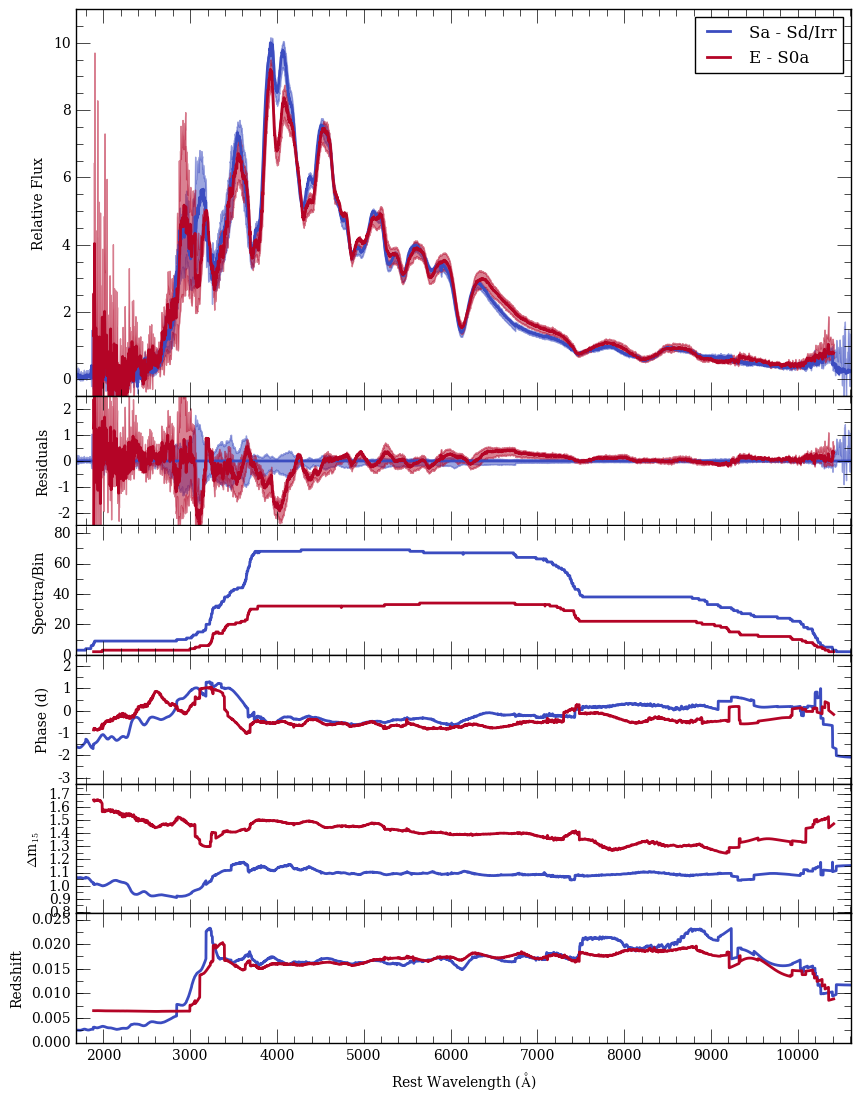

In [9]:
query_db.set_min_num_spec(comps_host_max, 1)
# query_db.comparison_plot(comps_host_max, scale_type=True)
query_db.comparison_plot(comps_host_max, scale_type=False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/all_dm15_host_max')
# query_db.stacked_plot(comps_host_max)

# Max-Mid dm15 Matched

In [11]:
# query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source < 1.1 or dm15_from_fits < 1.1))",
# #                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]
# query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Supernovae.SN != '2007bc' and Supernovae.SN != '1999ac'",
#                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.5) or (dm15_from_fits >= 1. and dm15_from_fits < 1.5)) and Supernovae.SN != '1997bp'"]
query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Supernovae.SN != '1999ac'",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1. and dm15_source < 1.5) or (dm15_from_fits >= 1. and dm15_from_fits < 1.5))"]
# query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and morphology >= 7 and ((dm15_cfa < 1.1 or dm15_from_fits < 1.1))",
#                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and morphology between 1 and 7 and ((dm15_cfa < 1.15 or dm15_from_fits < 1.15))"]

In [12]:
# comps_host_low_dm15, sn_arrays_low_dm15, boot_sn_arrays_low_dm15 = query_db.main(len(query_host_low_dm15), query_host_low_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_low_dm15, sn_arrays_low_dm15, boot_sn_arrays_low_dm15 = query_db.main(len(query_host_low_dm15), query_host_low_dm15, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Supernovae.SN != '1999ac'
173 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2004ef-20040918-hst.flm']
(5, 'questionable spectra removed', 78, 'spectra left')
(0, 'Peculiar Ias removed', 78, 'spectra left')
69 spectra with host corrections
173 questionable files currently ignored
19 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
19 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 7 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source 

Phase:  0.151065654637
dm15:  1.29087166159
Redshift:  0.0185069038681
Phase:  0.36850575105
dm15:  1.2701954403
Redshift:  0.0164159721915


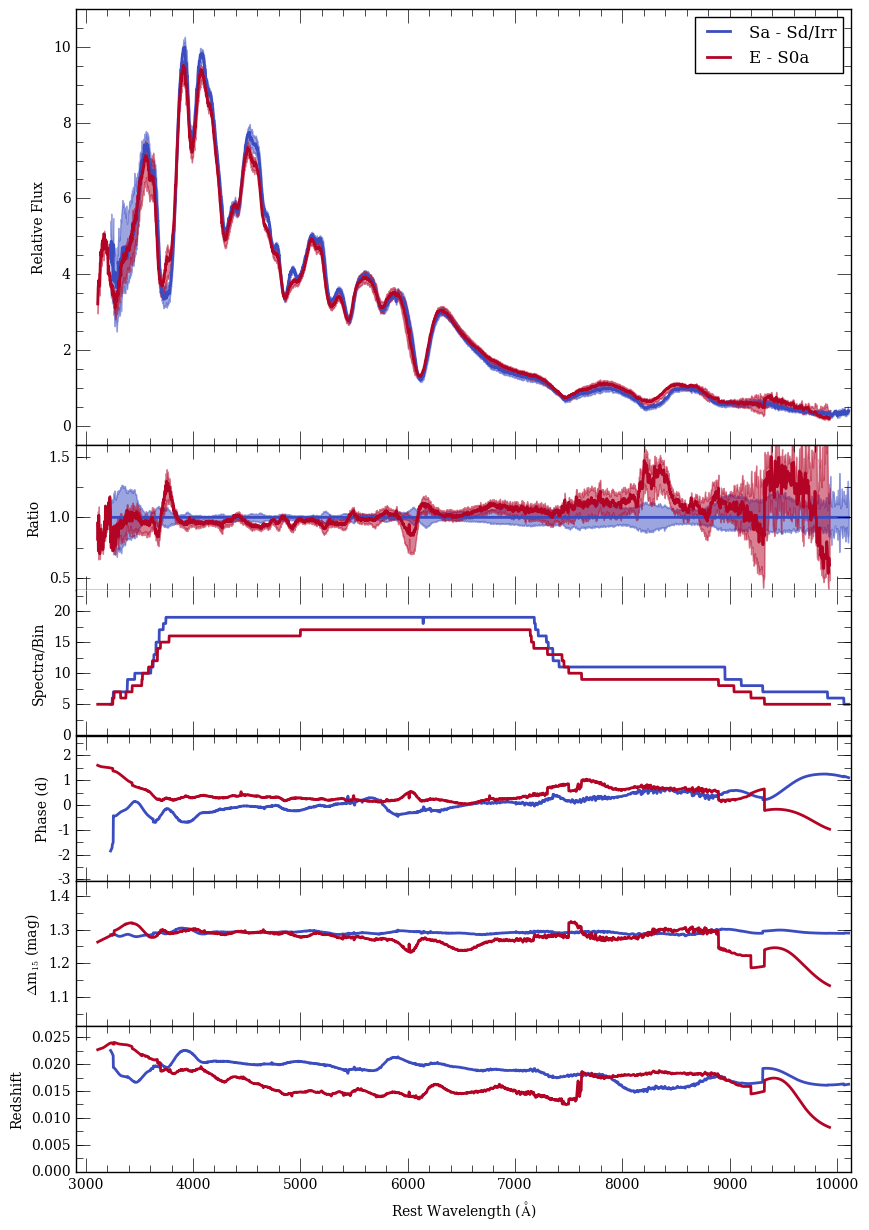

In [14]:
# composite.optimize_scales(comps_host_low_dm15, comps_host_low_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15, 1)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= True)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_max')
query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/host_max_dm13')

In [28]:
# query_host_mid_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '2007bc'",
#                               "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5)) and Supernovae.SN != '1997bp' and Supernovae.SN != '2008hv' and Supernovae.SN != '2002dj' and Supernovae.SN != '1994d'"]
query_host_mid_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '1999ac'",
                              "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.5) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.5))"]

In [29]:
comps_host_mid_dm15_m1week, sn_arrays_mid_dm15_m1week, boot_sn_arrays_mid_dm15_m1week = query_db.main(len(query_host_mid_dm15_m1week), query_host_mid_dm15_m1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '1999ac'
173 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm']
(5, 'questionable spectra removed', 66, 'spectra left')
(0, 'Peculiar Ias removed', 66, 'spectra left')
58 spectra with host corrections
173 questionable files currently ignored
16 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
16 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 7 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.

Phase:  -2.91182702276
dm15:  1.28547708453
Redshift:  0.0179528871508
Phase:  -2.48556571372
dm15:  1.29395246208
Redshift:  0.0143140835443


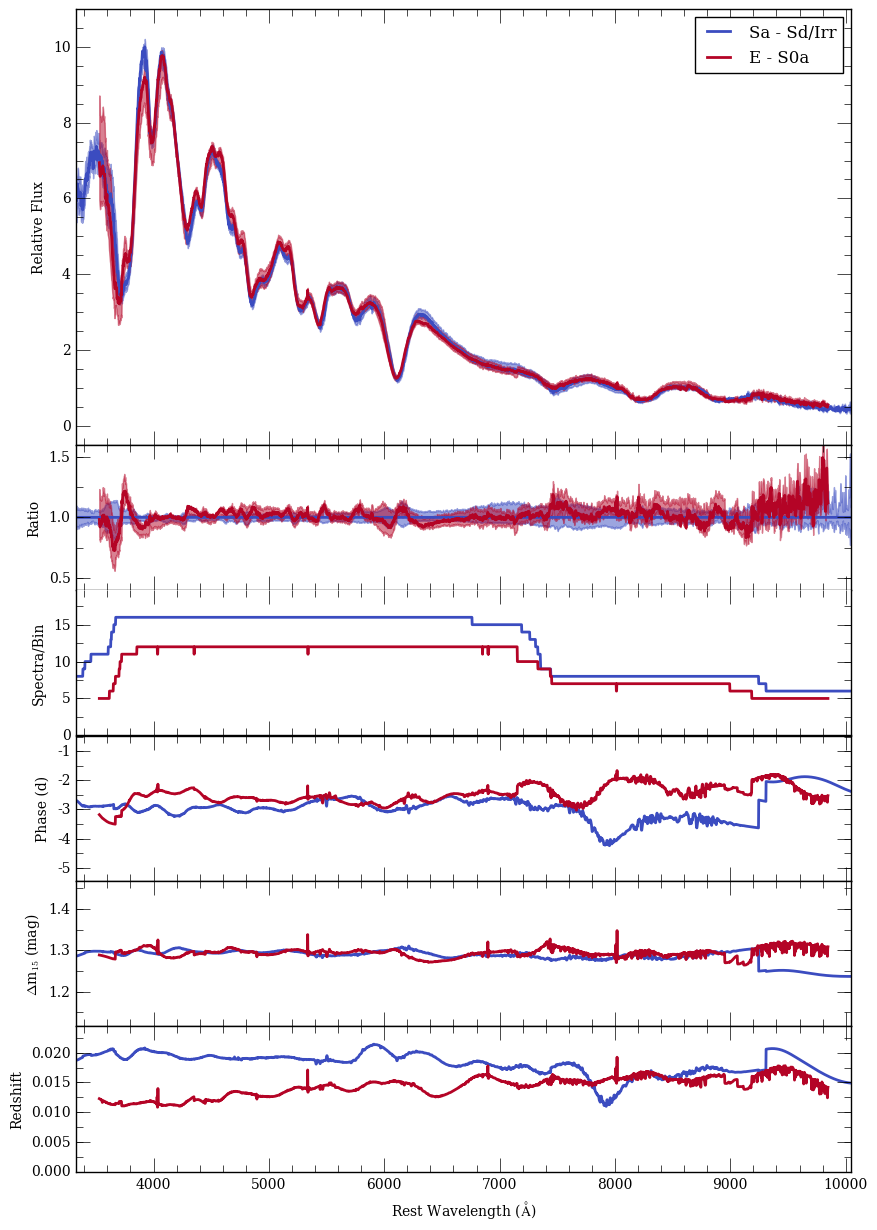

In [31]:
query_db.set_min_num_spec(comps_host_mid_dm15_m1week, 1)
query_db.comparison_plot(comps_host_mid_dm15_m1week, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'],zoom_ratio=True, savename='host_composites_updated/host_m3_dm13')
# query_db.comparison_plot(comps_host_mid_dm15_m1week, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'],zoom_ratio=True)

In [19]:
# query_host_mid_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '2007bc'",
#                               "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5)) and Supernovae.SN != '1997bp'"]
query_host_mid_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '1999ac'",
                              "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]

In [20]:
comps_host_mid_dm15_p1week, sn_arrays_mid_dm15_p1week, boot_sn_arrays_mid_dm15_p1week = query_db.main(len(query_host_mid_dm15_p1week), query_host_mid_dm15_p1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '1999ac'
173 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040918-hst.flm']
(4, 'questionable spectra removed', 67, 'spectra left')
(0, 'Peculiar Ias removed', 67, 'spectra left')
59 spectra with host corrections
173 questionable files currently ignored
18 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
18 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 7 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) 

Phase:  2.51647885282
dm15:  1.28615138436
Redshift:  0.0166116003792
Phase:  2.68091289555
dm15:  1.29796383175
Redshift:  0.0153036090582


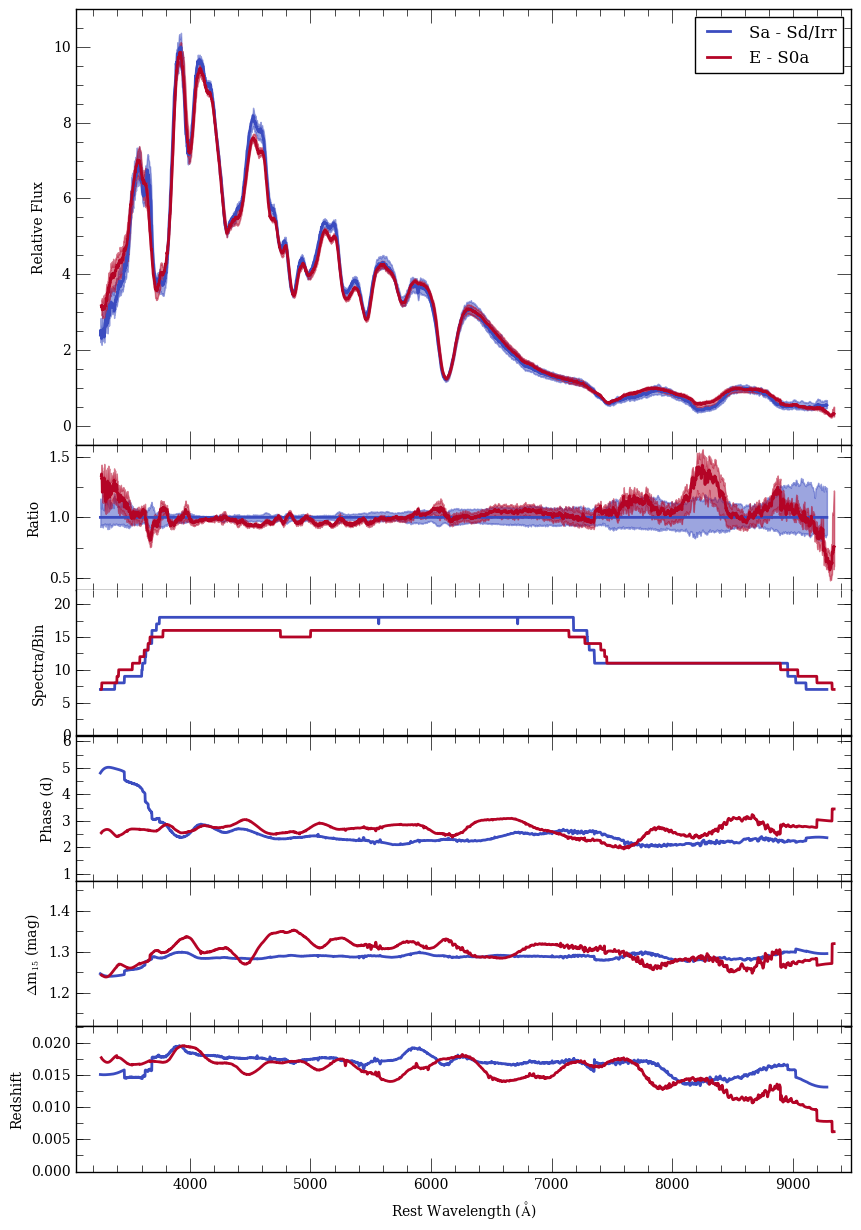

In [23]:
query_db.set_min_num_spec(comps_host_mid_dm15_p1week, 1)
query_db.comparison_plot(comps_host_mid_dm15_p1week, scale_type= False, min_num_show=7, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/host_p3_dm13')
# query_db.comparison_plot(comps_host_mid_dm15_p1week, scale_type= False, min_num_show=7, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True)

In [24]:
# query_host_mid_dm15_pmore = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 11 and NED_host >= 10 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Supernovae.SN != '2007bc' and Supernovae.SN != '2002er' and Supernovae.SN != '1996z' and Supernovae.SN != '2003cg'",
#                              "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.45) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.45)) and Supernovae.SN != '1997bp' and Supernovae.SN != '1999ac'"]
query_host_mid_dm15_pmore = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 11 and NED_host >= 10 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Supernovae.SN != '1999ac'",
                             "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.45) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.45))"]

In [25]:
comps_host_mid_dm15_pmore, sn_arrays_mid_dm15_pmore, boot_sn_arrays_mid_dm15_pmore = query_db.main(len(query_host_mid_dm15_pmore), query_host_mid_dm15_pmore, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 11 and NED_host >= 10 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Supernovae.SN != '1999ac'
173 questionable files currently ignored
(11, 'questionable spectra removed', 60, 'spectra left')
(0, 'Peculiar Ias removed', 60, 'spectra left')
56 spectra with host corrections
173 questionable files currently ignored
18 valid SNe found
Arrays cleaned
2 spectra may have telluric contamination
18 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 7 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.45) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.45))


Phase:  8.22205649489
dm15:  1.2835652542
Redshift:  0.0135868296178
Phase:  8.25842435166
dm15:  1.27477915559
Redshift:  0.0155525749554


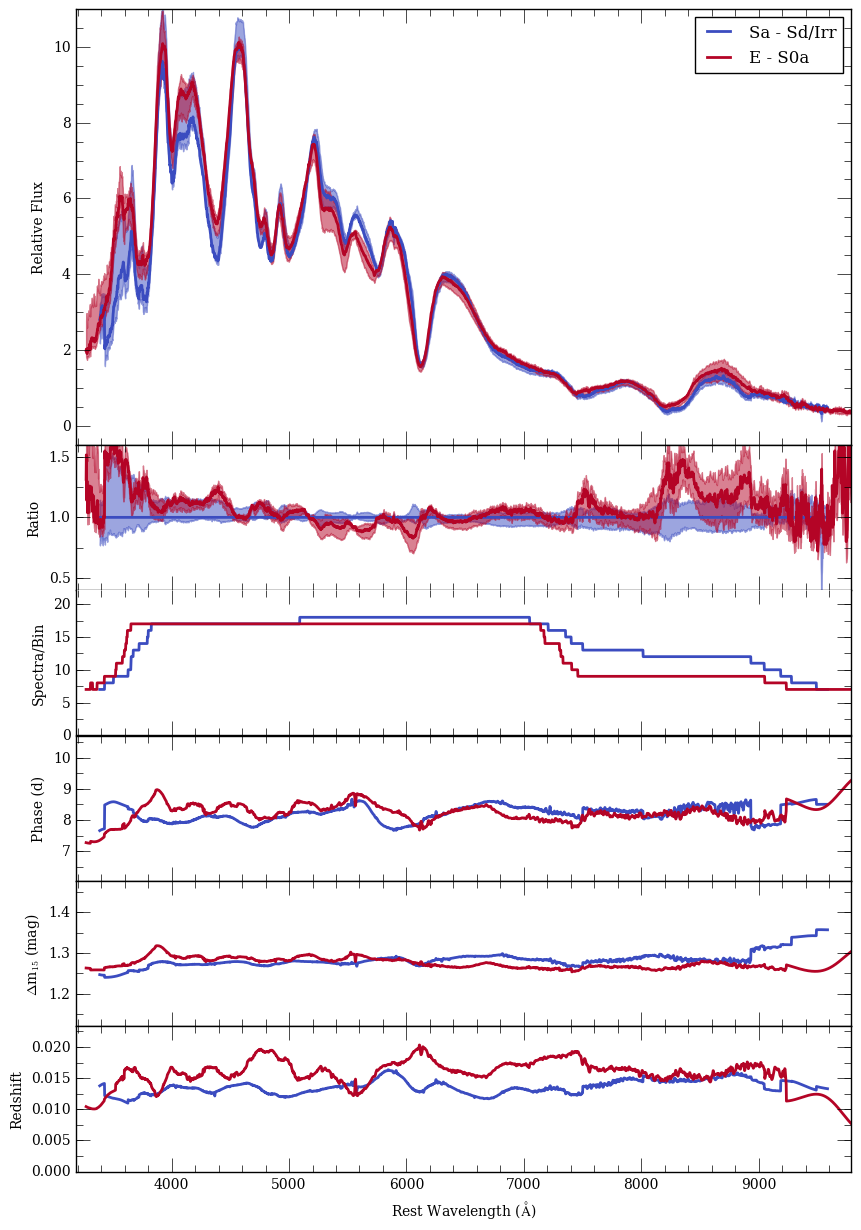

In [27]:
query_db.set_min_num_spec(comps_host_mid_dm15_pmore, 1)
query_db.comparison_plot(comps_host_mid_dm15_pmore, scale_type= False, min_num_show=7, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/host_p9_dm13')

# Max-High dm15 Matched

In [14]:
# query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.15 and dm15_source < 1.9) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.9))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.15 and dm15_source < 1.5) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.5)) and Supernovae.SN != '2008ia'"]
query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45))"]

In [15]:
# comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2004ef-20040918-hst.flm']
4 questionable spectra removed 54 spectra left
5 Peculiar Ias removed 49 spectra left
39 spectra with host corrections
172 questionable files currently ignored
10 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
10 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 2 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm

-0.162779726842
1.34276533441
0.344992531562
1.34267830931


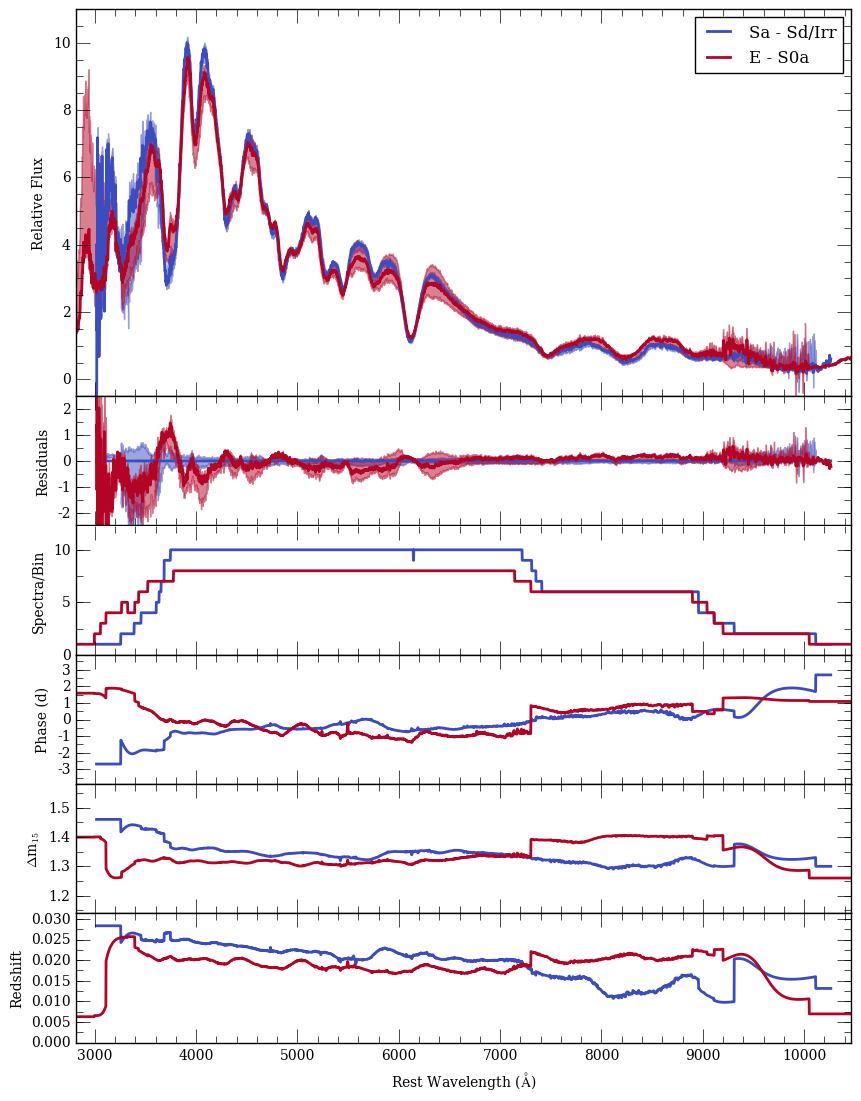

In [16]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/high_dm15_host_max')

# +1 Week-Low dm15 Matched

In [17]:
query_host_low_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [18]:
comps_host_low_dm15_p1week, sn_arrays_low_dm15_p1week, boot_sn_arrays_low_dm15_p1week = query_db.main(len(query_host_low_dm15_p1week), query_host_low_dm15_p1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
172 questionable files currently ignored
1 questionable spectra removed 29 spectra left
0 Peculiar Ias removed 29 spectra left
26 spectra with host corrections
172 questionable files currently ignored
17 valid SNe found
Arrays cleaned
17 spectra may have telluric contamination
17 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 5 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))
172 questionable files currently ignored
0 questionable spectra removed 11 spectra left
0 Peculia

6.32394186246
1.02985627134
6.83483977494
1.06079003646


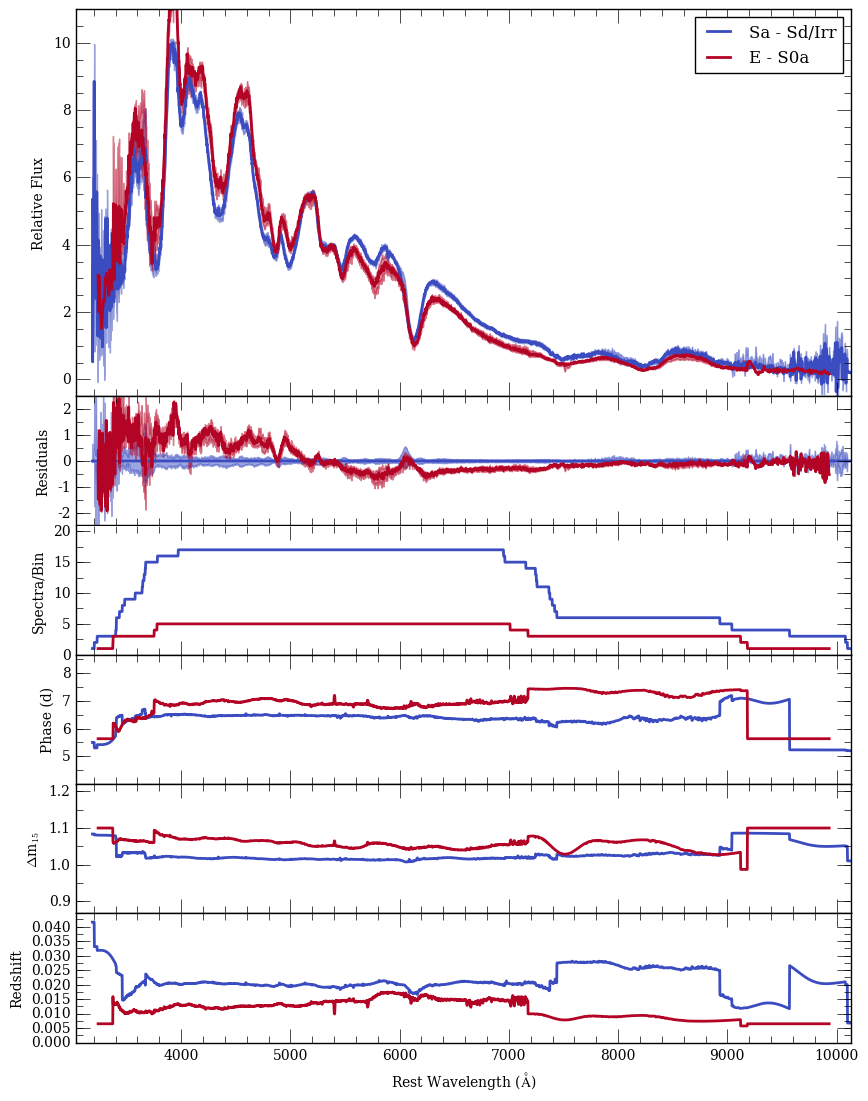

In [19]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_p1week')

# +1 Week-High dm15 Matched

In [20]:
query_host_high_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [21]:
comps_host_high_dm15_p1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_p1week), query_host_high_dm15_p1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
1 questionable spectra removed 26 spectra left
0 Peculiar Ias removed 26 spectra left
21 spectra with host corrections
172 questionable files currently ignored
8 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
8 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 5 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'
172 questionable fi

6.92800519464
1.36045603157
7.58052346057
1.38911758851


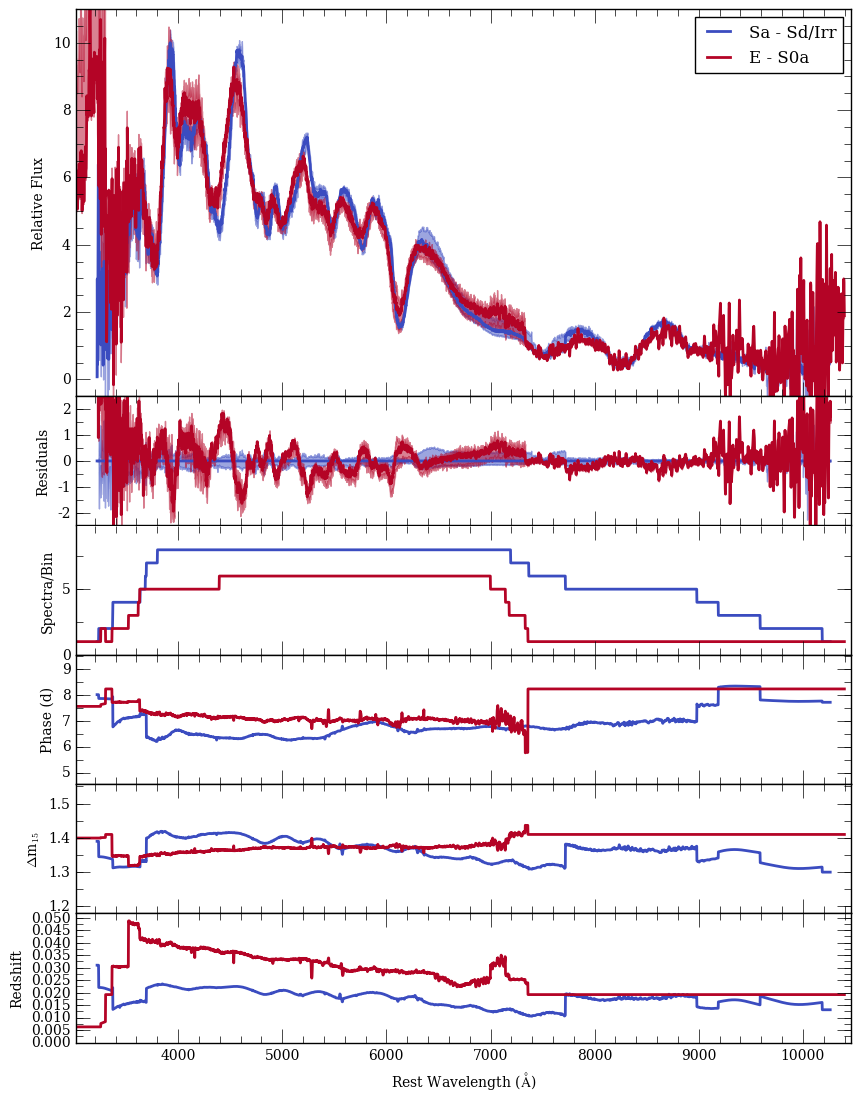

In [22]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/high_dm15_host_p1week')

# -1 Week-Low dm15 Matched

In [23]:
query_host_low_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [24]:
comps_host_low_dm15_m1week, sn_arrays_low_dm15_m1week, boot_sn_arrays_low_dm15_m1week = query_db.main(len(query_host_low_dm15_m1week), query_host_low_dm15_m1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
172 questionable files currently ignored
2 questionable spectra removed 48 spectra left
0 Peculiar Ias removed 48 spectra left
46 spectra with host corrections
172 questionable files currently ignored
18 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
18 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 3 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))
172 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050603

-6.80056333422
1.03873962341
-6.46939975844
1.01990214877


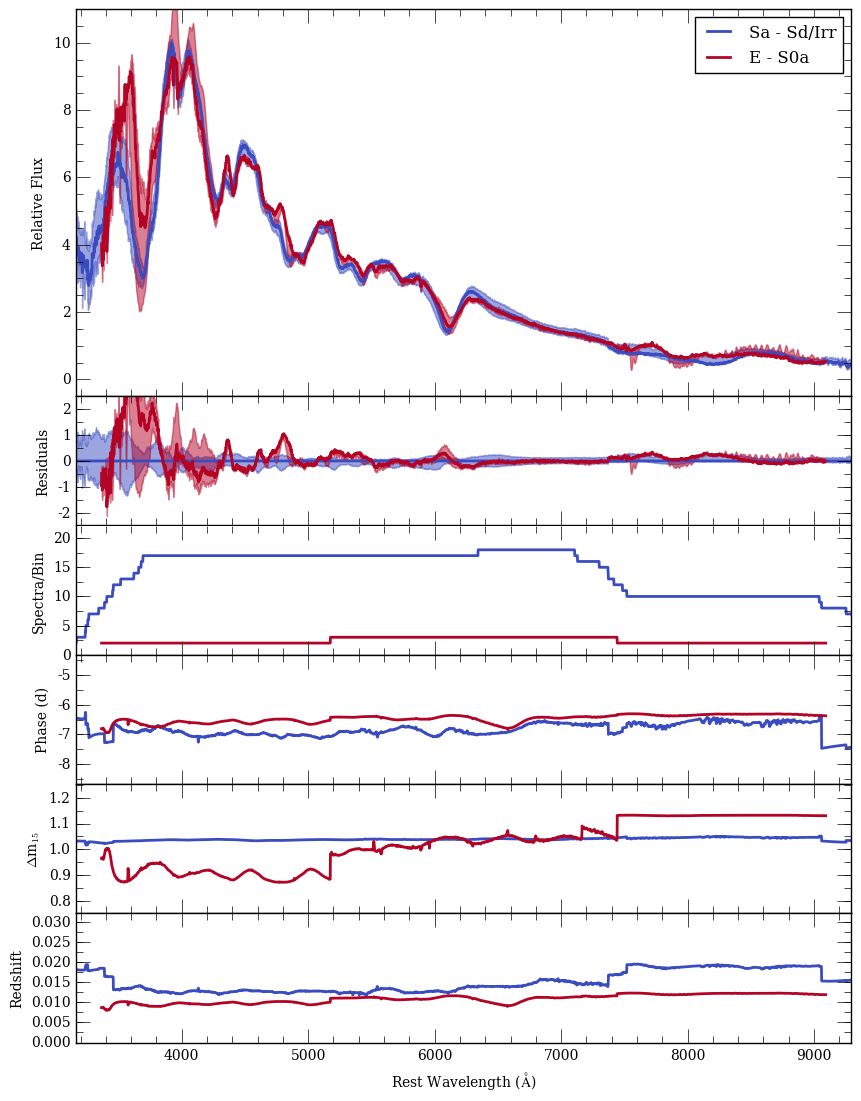

In [25]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_m1week, scale_type=False, min_num_show=2, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_m1week')

In [26]:
query_host_high_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [27]:
comps_host_high_dm15_m1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_m1week), query_host_high_dm15_m1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
1 questionable spectra removed 42 spectra left
6 Peculiar Ias removed 36 spectra left
28 spectra with host corrections
172 questionable files currently ignored
9 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
9 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 2 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'
172 questionabl

-5.82422884136
1.41953586444
-5.81620661784
1.41581278456


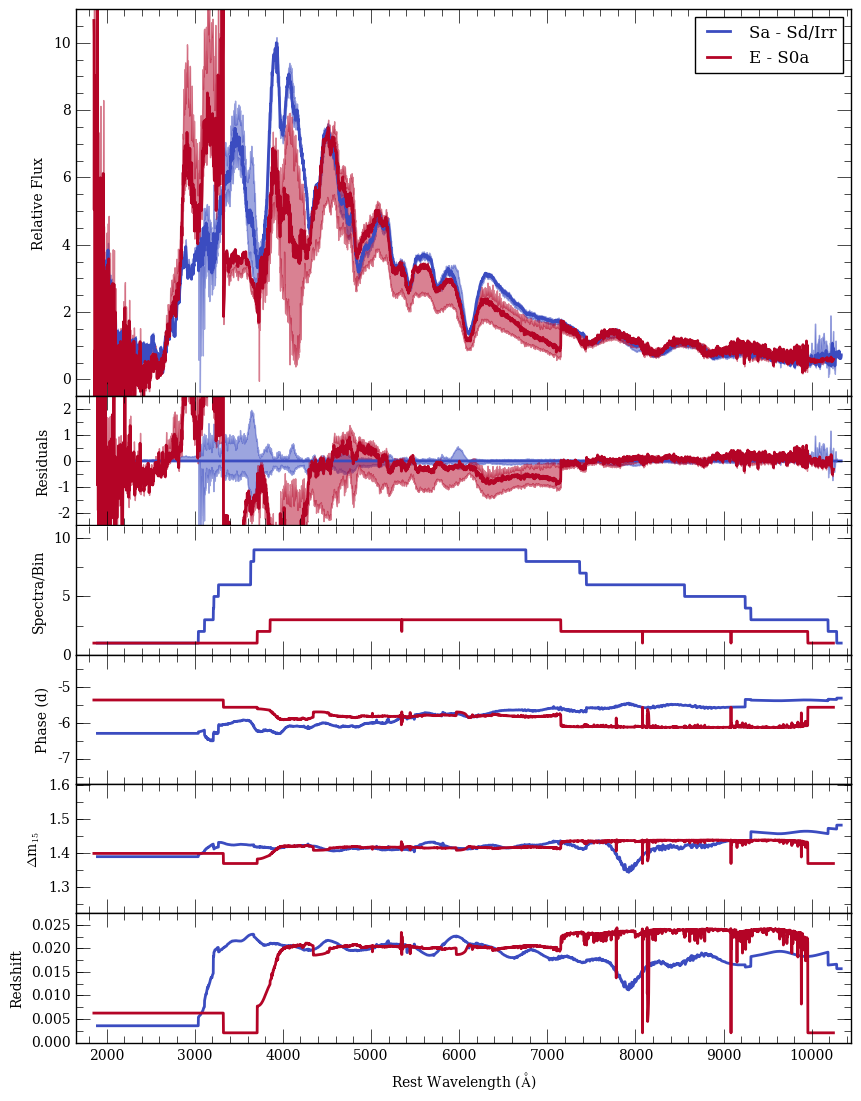

In [29]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_m1week, scale_type=False, min_num_show=1, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/high_dm15_host_m1week')